# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Soccer Database**: This database contains data for soccer matches,
players, and teams from several European countries from 2008 to 2016. 
The databse consists of seven tables: Country; League; Player, Player Attributes; Match; Team; Team Attributes.
The Country and League tables are linked with the country_id columns, as they denote the country where the league takes place. The Match table is linked to both Country and League tables through the country_id and league_id columns. The player and player attributes tables are linked via the player_api_id and player_fifa_api_id columns. Similarly, the team and team attributes tables are linked via the team_api_id and team_fifa_api_id columns. Finally, the match table is linked to the team and league tables via the team_id and league_id columns.   
 

### Questions for Analysis
>Using the provided data,is there a correlation between overall rating and potential?  
Who are the 10 players with the highest overall ratings? And who are the 10 players with the lowest overall ratings?
If there was a correlation between overall rating and potential, is it the same for the top 10 players and bottom 10 players?
Are attributes like strength and finishing similar in the two groups? 
What is the preferred foot in each group?

In [1]:
# imports and load data
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading data 
df_country = pd.read_csv('Database_Soccer/Country.csv')
df_league = pd.read_csv('Database_Soccer/League.csv')
df_match = pd.read_csv('Database_Soccer/Match.csv')
df_player = pd.read_csv('Database_Soccer/Player.csv')
df_player_attributes = pd.read_csv('Database_Soccer/Player_Attributes.csv')
df_team = pd.read_csv('Database_Soccer/Team.csv')
df_team_attributes = pd.read_csv('Database_Soccer/Team_Attributes.csv')

## Inspecting data

Function for checking column titles

In [3]:
#creating a function to check column titles of two dataframes
a = df_player
b = df_player_attributes

def checking_data(a, b):
    print(a.head())
    print(b.head())
checking_data(a,b)

   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154  
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  201

Checking for missing data and data types

In [4]:
#checking for missing data and data types using info function
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [5]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


Checking number of rows and columns

In [6]:
#checking number of rows and columns using shape function
df_player_attributes.shape

(183978, 42)


### Data Cleaning
 

Deleting rows with missing data and cheching after deletion

In [7]:
#Deleting rows with missing data using dropna function
df_player.dropna(inplace=True)
df_player_attributes.dropna(inplace=True)

In [8]:
#Checking if there is missing data after deletion
df_player.isnull().sum().any()
df_player_attributes.isnull().sum().any()

False

Checking for dupicates

In [9]:
#Checking for duplicates
print(df_player.duplicated().sum())
print(df_player_attributes.duplicated().sum())

0
0


Checkin data types

In [10]:
#Checking data types using dtypes function
df_player.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

In [11]:
#Checking data types using dtypes function
df_player_attributes.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

Sorting data and checking after sorting

In [12]:
#Sorting data according to column using cort_values function
df_player.sort_values(by=['player_api_id'], inplace=True)

In [13]:
#Checking table after sorting using head function
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
8359,8372,2625,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154
2636,2639,2752,Diego Mainz,135819,1982-12-29 00:00:00,187.96,174
5312,5319,2768,Jose Dorado,110019,1982-07-10 00:00:00,180.34,154
4335,4339,2770,Ignacio Gonzalez,182861,1982-05-14 00:00:00,180.34,161
305,306,2790,Alberto Rey,110809,1974-02-15 00:00:00,175.26,163


In [14]:
#Sorting data according to column
df_player_attributes.sort_values(by=['player_api_id'], inplace=True)

Creating a dictionary for player names and ids

In [15]:
#Creating dictionary for player names and ids using set_index and to_dict functions
playername_dictionary = df_player.set_index('player_api_id').to_dict()['player_name']
print(playername_dictionary)

{2625: 'Patryk Rachwal,18', 2752: 'Diego Mainz', 2768: 'Jose Dorado', 2770: 'Ignacio Gonzalez', 2790: 'Alberto Rey', 2796: 'Javier Jimenez', 2802: 'Pablo Hernandez', 2805: 'Ruben Perez', 2857: 'Ivan Perez', 2862: 'Vicente Sanchez', 2907: 'Gregory Lacombe', 2973: 'Ugur Inceman', 2977: 'David Rivas Rodriguez', 2983: 'Jorge Molina', 2984: 'Sergio Aragones', 3140: 'Alexandre Hauw', 3204: 'Marat Izmailov', 3263: 'Kelly Berville', 3264: 'Abdelmalek Cherrad', 3316: 'Oscar Sanchez', 3329: 'Vincent Euvrard', 3377: 'Luca Belingheri', 3441: 'Aleksander Radosavljevic', 3512: 'Peter Halmosi', 3517: 'Alexandr Kerzhakov', 3520: 'Andrey Arshavin', 4747: 'Lee Wilkie', 4863: 'Boban Grncarov', 4902: 'Iriney', 4939: 'Tim Clancy', 4999: 'Sebastian Olszar', 5016: 'Ibrahim Sidibe', 5044: 'Jeroen Verhoeven', 5047: 'Wilko de Vogt', 5063: 'Sander Duits', 5184: 'Gudmundur Steinarsson', 5192: 'Manuel Silas', 5202: 'Remy Gomis', 5217: 'Laurent Batlles', 5223: 'Raffaele Rubino', 5233: 'Iban Javier Cuadrado', 5243: 

Appending palyer names to player_attributes table and saving to new file

In [16]:
#Appending player names to player_attributes table and
# saving table to a new file using map and to csv functions
df_player_attributes['player_names'] = df_player_attributes.player_api_id.map(playername_dictionary)
df_player_attributes.drop(columns=['id','player_fifa_api_id', 'player_api_id', 'gk_reflexes', 'gk_positioning', 'gk_kicking', 'gk_handling', 'gk_diving', 'sprint_speed'], inplace=True)
df_player_attributes.to_csv('player_attributesv2.csv', index=False)

Loading data into a new dataframe

In [17]:
#loading data
df_player_attributesv2 = pd.read_csv('player_attributesv2.csv')

Checking new file

In [18]:
#Checking new file using head function
df_player_attributesv2.head(3)

,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,player_names
0,2015-01-16 00:00:00,61.0,61.0,right,medium,medium,50.0,47.0,46.0,52.0,...,54.0,71.0,64.0,49.0,55.0,66.0,62.0,63.0,54.0,"Patryk Rachwal,18"
1,2014-11-07 00:00:00,61.0,61.0,right,medium,medium,50.0,47.0,46.0,52.0,...,54.0,71.0,64.0,49.0,55.0,66.0,62.0,63.0,54.0,"Patryk Rachwal,18"
2,2007-02-22 00:00:00,63.0,64.0,right,high,medium,48.0,48.0,47.0,64.0,...,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,"Patryk Rachwal,18"


In [19]:
#checking new file unsing describe function based on the overall_rating column
df_player_attributesv2.describe().overall_rating

count    180354.000000
mean         68.635317
std           7.027950
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

ValueError: DataFrame constructor not properly called!

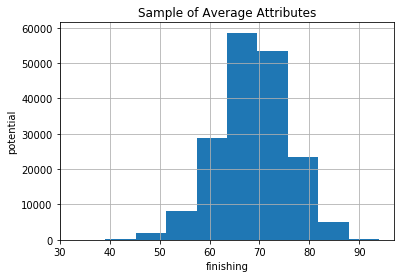

In [21]:
ax = df_player_attributesv2['overall_rating'].hist()
ax.set_ylabel('potential')
ax.set_xlabel('finishing')
ax.set_title('Sample of Average Attributes')
pd.DataFrame(df_player_attributesv2['overall_rating'].describe);

Creating a dataframe for most prevalent attributes and checking result

In [65]:
#creating a dataframe for the most prevalent attributes using groupby function
df_prevalent_attributes = df_player_attributesv2.groupby(['player_names'])['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'].agg(pd.Series.mode)
df_prevalent_attributes.head()

,preferred_foot,attacking_work_rate,defensive_work_rate
player_names,,,
Aaron Appindangoye,right,medium,medium
Aaron Cresswell,left,medium,medium
Aaron Doran,right,medium,medium
Aaron Galindo,right,medium,medium
Aaron Hughes,right,medium,medium


Creating a pie chart for the Prevalent attribute 'Preffered Foot'

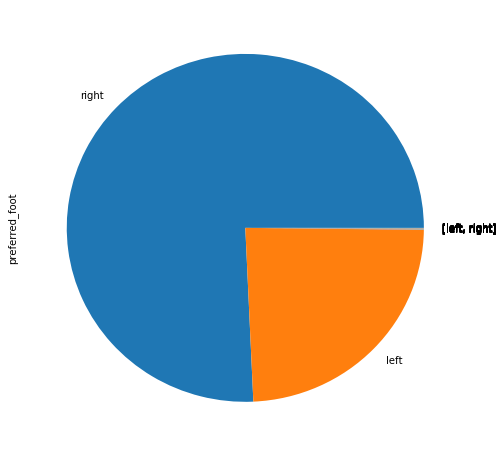

In [66]:
#Visulalizing the most prevalent attribute 'preferred foot' using plot function
df_prevalent_attributes['preferred_foot'].value_counts().plot(kind='pie', y='preferred_foot', figsize=(8, 8));

Calculating average attributes

In [67]:
#Calculating the average attributes of players using mean function
df_average_player_attributes = df_player_attributesv2.groupby('player_names').mean()
print(df_average_player_attributes)

                             overall_rating  potential   crossing  finishing  \
player_names                                                                   
Aaron Appindangoye                63.600000  67.600000  48.600000  43.600000   
Aaron Cresswell                   66.969697  74.484848  70.787879  49.454545   
Aaron Doran                       67.000000  74.192308  68.115385  57.923077   
Aaron Galindo                     69.086957  70.782609  57.217391  26.260870   
Aaron Hughes                      73.240000  74.680000  45.080000  38.840000   
Aaron Hunt                        77.259259  80.148148  73.888889  72.814815   
Aaron Kuhl                        60.571429  76.000000  47.571429  31.571429   
Aaron Lennon                      79.769231  82.000000  78.038462  65.961538   
Aaron Lennox                      48.000000  56.857143  12.000000  15.000000   
Aaron Meijers                     67.052632  69.421053  63.894737  46.052632   
Aaron Mokoena                     71.625

Merging prevalent non-numerical attributes and average attributes of players

In [68]:
df_merged = df_prevalent_attributes.merge(df_average_player_attributes, on='player_names')
df_merged.head()

,preferred_foot,attacking_work_rate,defensive_work_rate,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
player_names,,,,,,,,,,,,,,,,,,,,,
Aaron Appindangoye,right,medium,medium,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,...,76.000000,34.600000,65.800000,52.200000,44.600000,53.600000,47.600000,63.800000,66.000000,67.800000
Aaron Cresswell,left,medium,medium,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,...,51.757576,54.121212,65.060606,57.878788,51.484848,57.454545,53.121212,69.393939,68.787879,71.515152
Aaron Doran,right,medium,medium,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,...,70.076923,58.038462,59.115385,47.269231,61.807692,69.384615,60.538462,22.038462,21.115385,21.346154
Aaron Galindo,right,medium,medium,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,...,78.695652,31.304348,69.304348,61.565217,35.913043,53.782609,41.739130,70.608696,70.652174,68.043478
Aaron Hughes,right,medium,medium,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,...,73.800000,24.280000,69.680000,76.840000,40.080000,46.480000,52.960000,77.600000,76.040000,74.600000


Checking data visually

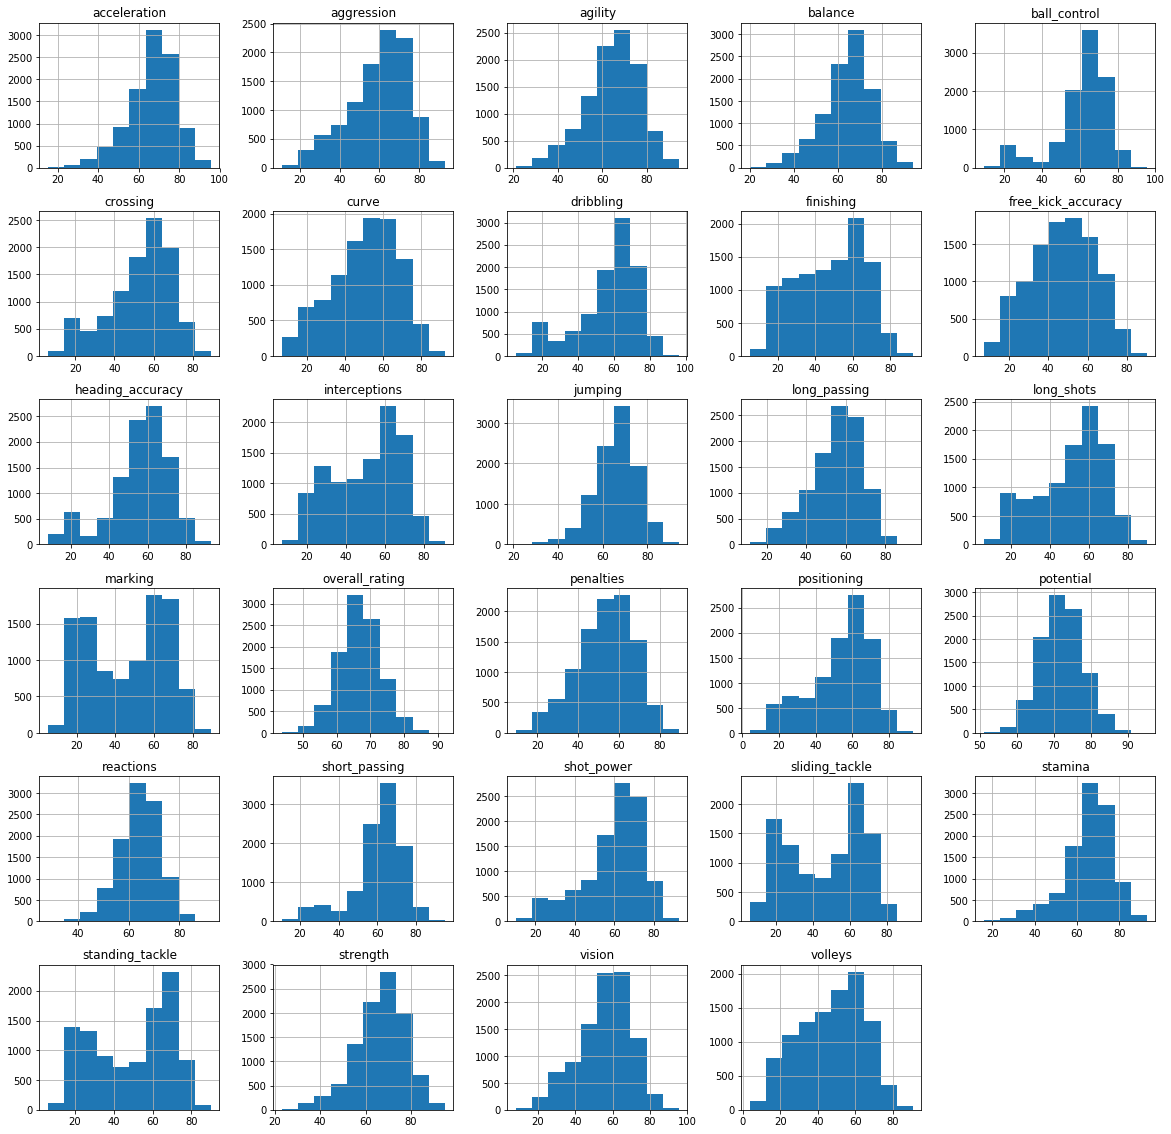

In [69]:
#Checking the data visually using hist function
df_merged.hist(figsize=(20,20));


# Scatter Plot to visualize relation between overall rating and potential
The scatter plot shows a strong correlation between overall rating and potential.

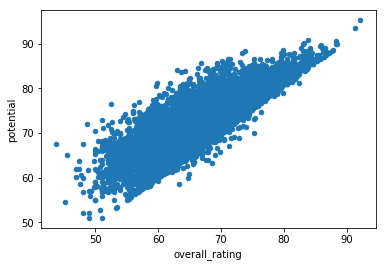

In [70]:
# Visually checking correlation between overall rating and potential
# for all players in the sample.
df_merged.plot.scatter(x='overall_rating', y='potential');

Calculating the 10 players with top and bottom overall rating

In [72]:
# Calculating the 10 players with top and bottom overall rating
# using nlargest and nsmallest functions
df_highest_rated = df_merged.nlargest(10, 'overall_rating')
df_lowest_rated = df_merged.nsmallest(10, 'overall_rating')

Checking the data visually for the top and bottom 10 players

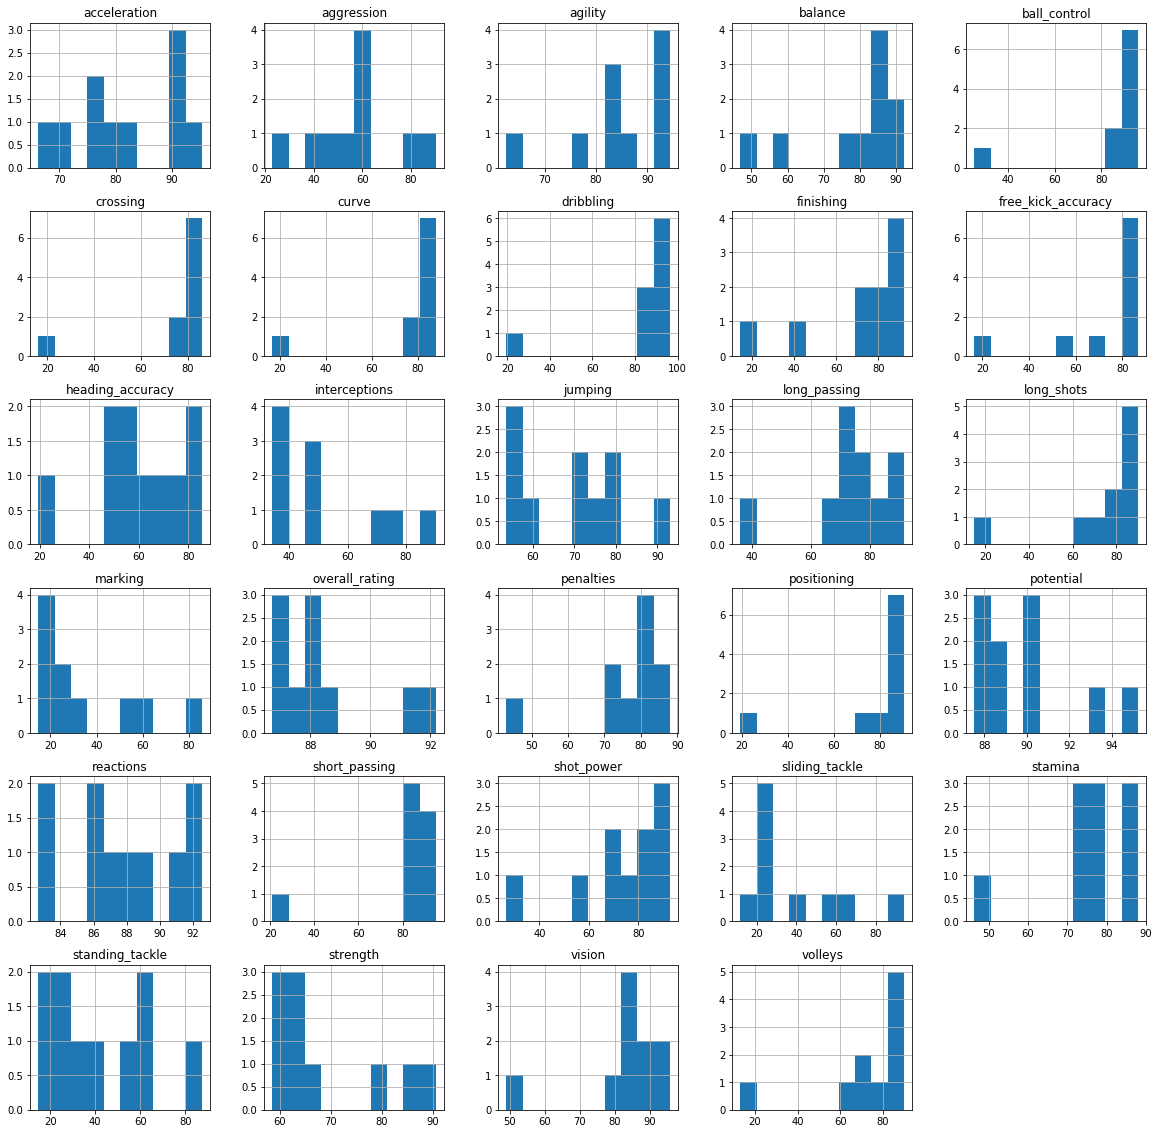

In [73]:
#Checking the data visually for the top 10 players using hist function
df_highest_rated.hist(figsize=(20,20));

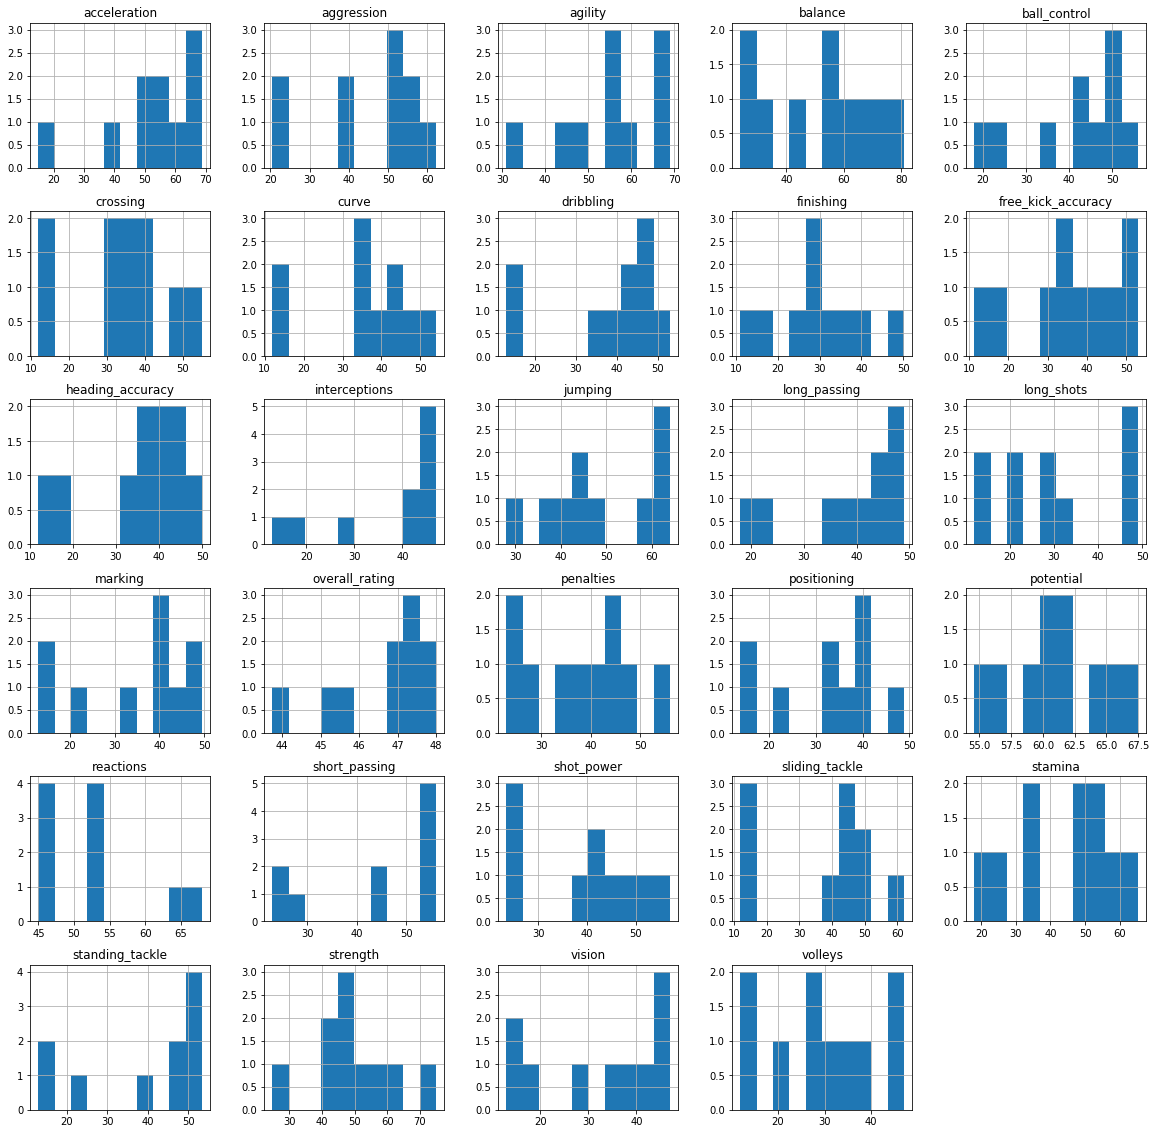

In [74]:
#Checking the data visually for the bottom 10 players using hist function
df_lowest_rated.hist(figsize=(20,20));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is there a relation between strength, potential and overall rating?)

The below histograms show a more uniform correlation between potential,
strength, and overall rating for the top 10 players, while the
correlatoin seem less uniform for the bottom 10.

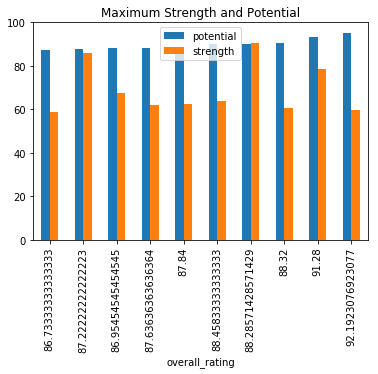

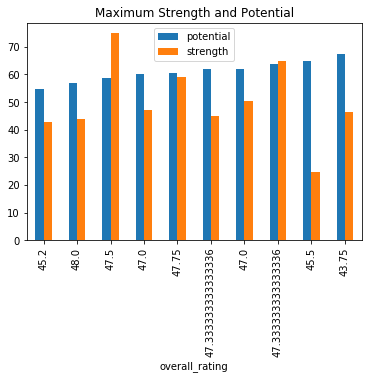

In [75]:
#   Investigating corelation between Strenght, potential and overall rating.
df_highest_rated.groupby(['potential', 'strength'], as_index=False)['overall_rating'].mean().plot(x='overall_rating', kind='bar', title='Maximum Strength and Potential');
df_lowest_rated.groupby(['potential', 'strength'], as_index=False)['overall_rating'].mean().plot(x='overall_rating', y=None, kind='bar', title='Maximum Strength and Potential');

# Scatter plots for overall rating and potential
The scatter plots show a strong correlation between overall rating and
potential for the top 10 players and slightly less unifrom correlation
for the bottom 10 players. 

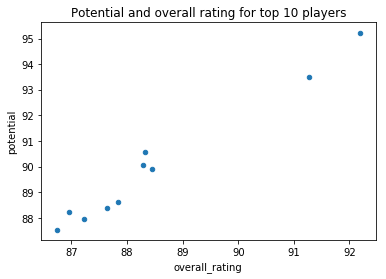

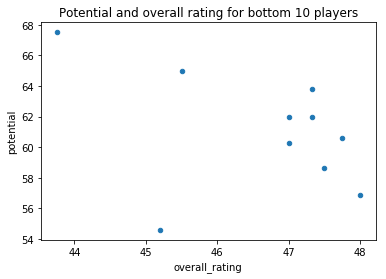

In [77]:
#   Investigating corelation between overall rating and potential.
df_highest_rated.plot.scatter(x='overall_rating', y='potential', title='Potential and overall rating for top 10 players');
df_lowest_rated.plot.scatter(x='overall_rating', y='potential', title='Potential and overall rating for bottom 10 players');

# Comparing attributes of the two groups
The figures show that the highest rated players are skewed to
the left while the bottom players are skewed to the right.

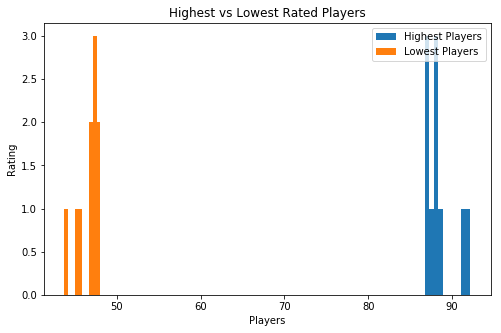

In [79]:
# Comparing the attributes of players with highest rating to players with lowest rating
fig, ax = plt.subplots(figsize =(8,5))
ax.hist(df_highest_rated['overall_rating'], alpha=1, label='Highest Players')
ax.hist(df_lowest_rated['overall_rating'], alpha=1, label='Lowest Players')
ax.set_title('Highest vs Lowest Rated Players')
ax.set_xlabel('Players')
ax.set_ylabel('Rating')
ax.legend(loc='upper right')
plt.show();

# Bar plots for attributes of the two groups
The two graphes show higher rates in most attributes for
the top 10 players as compared to the bottom 10 players.

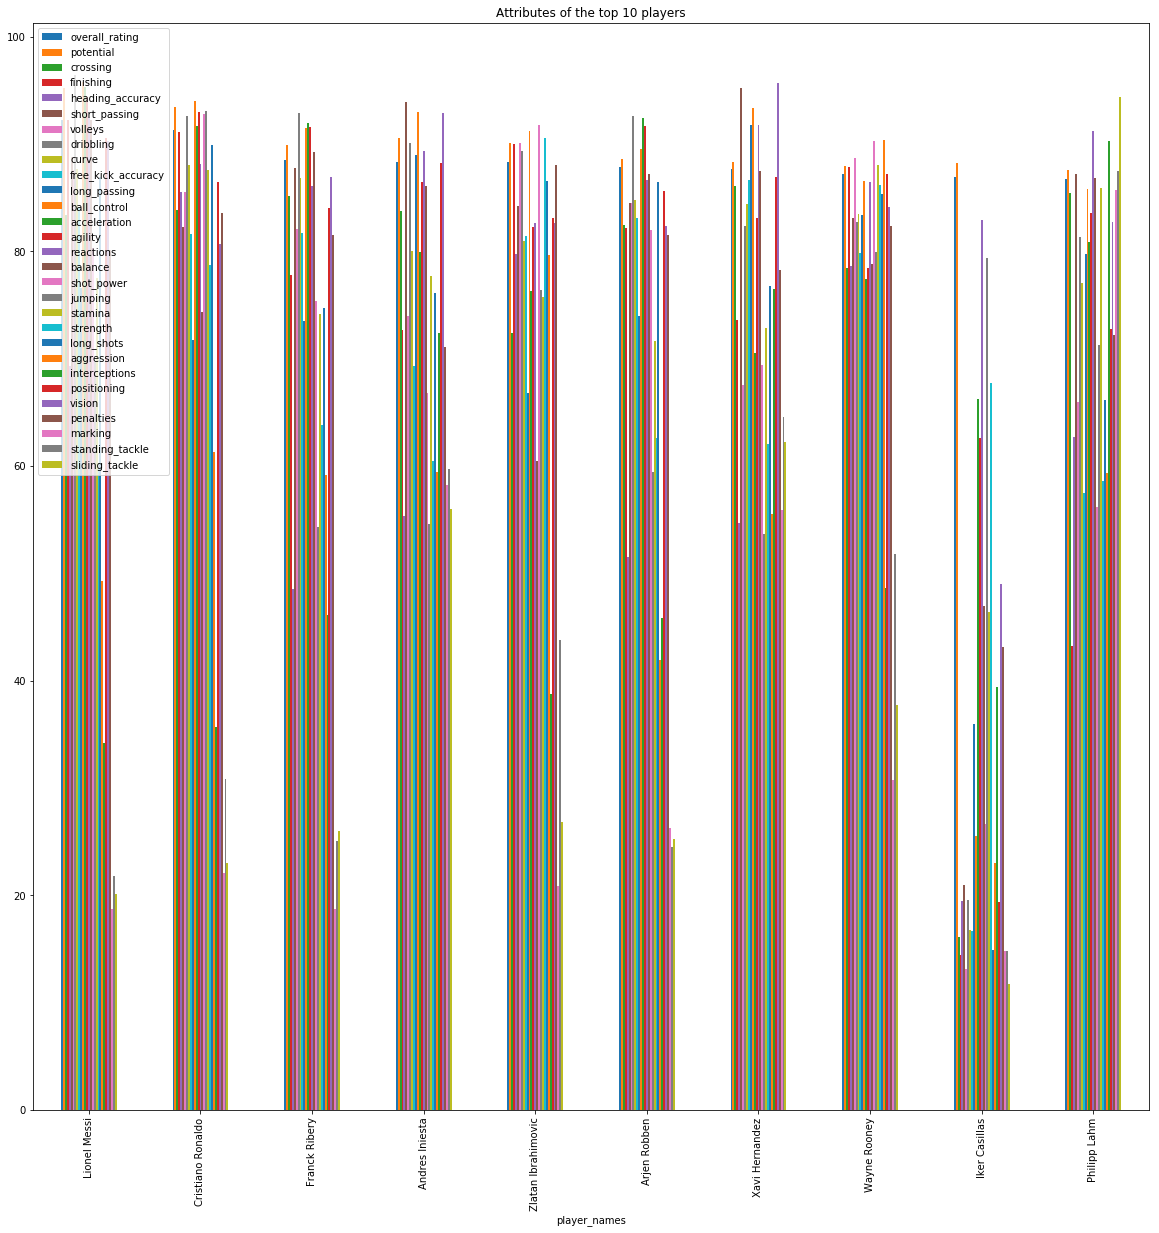

In [81]:
#Creating a bar plot for the attributes of the top 10 players
df_highest_rated.plot(figsize=(20, 20), kind='bar', title='Attributes of the top 10 players');

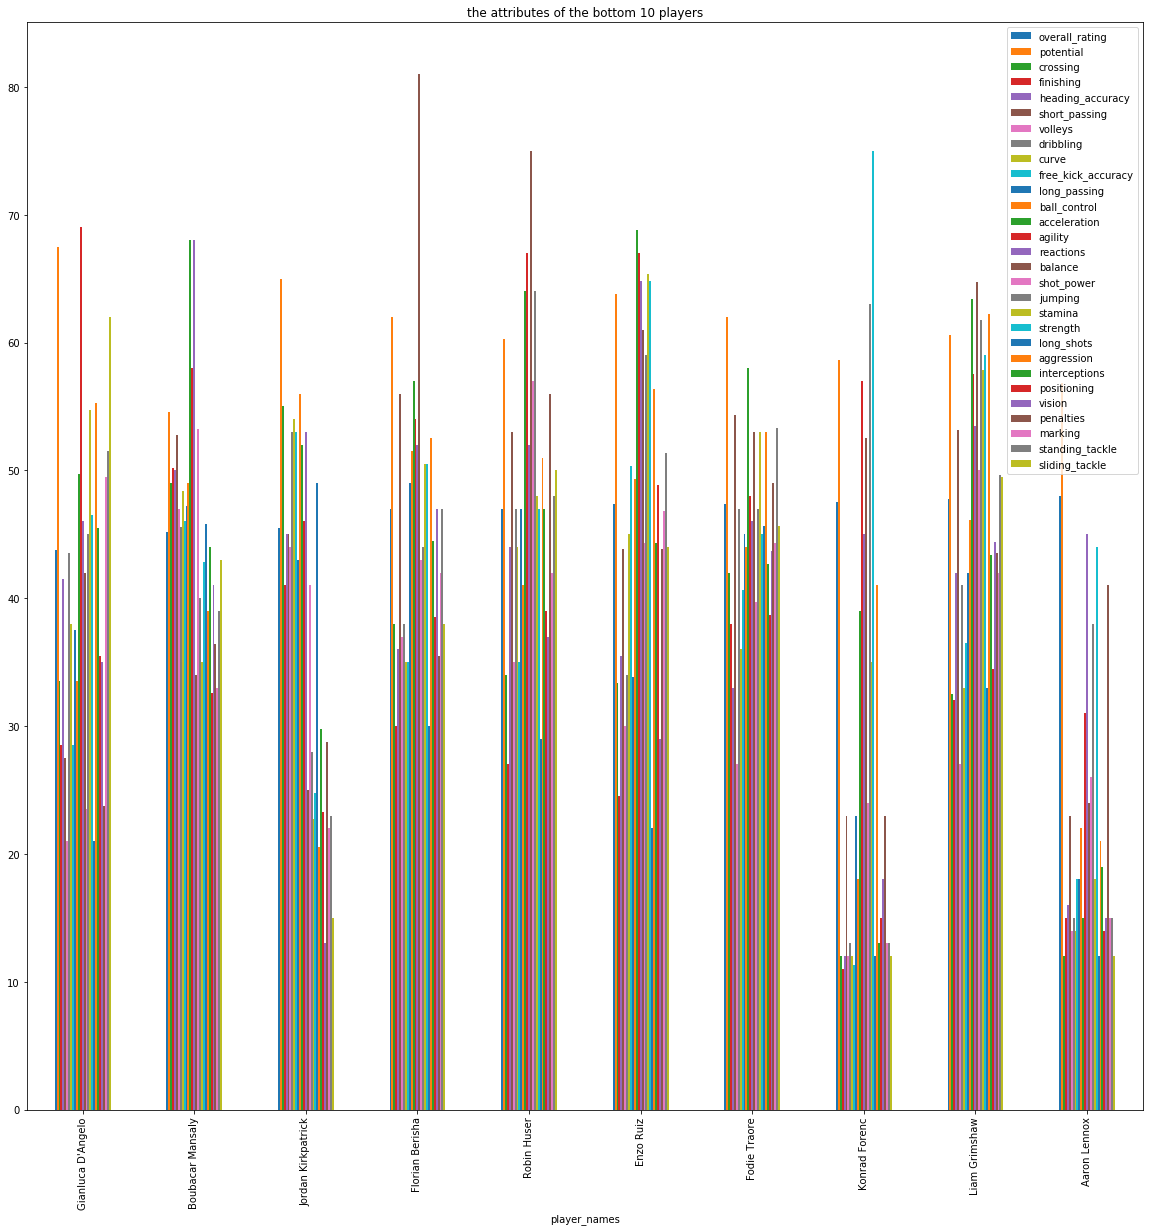

In [82]:
#Creating a bar plot for the attributes of the lowest 10 players
df_lowest_rated.plot(figsize=(20, 20), kind='bar', title='the attributes of the bottom 10 players');

# Line graph for all attributes of the two groups
The line graphes show a more uniform correlation between
the attributes of the top players as opposed to the bottom players.

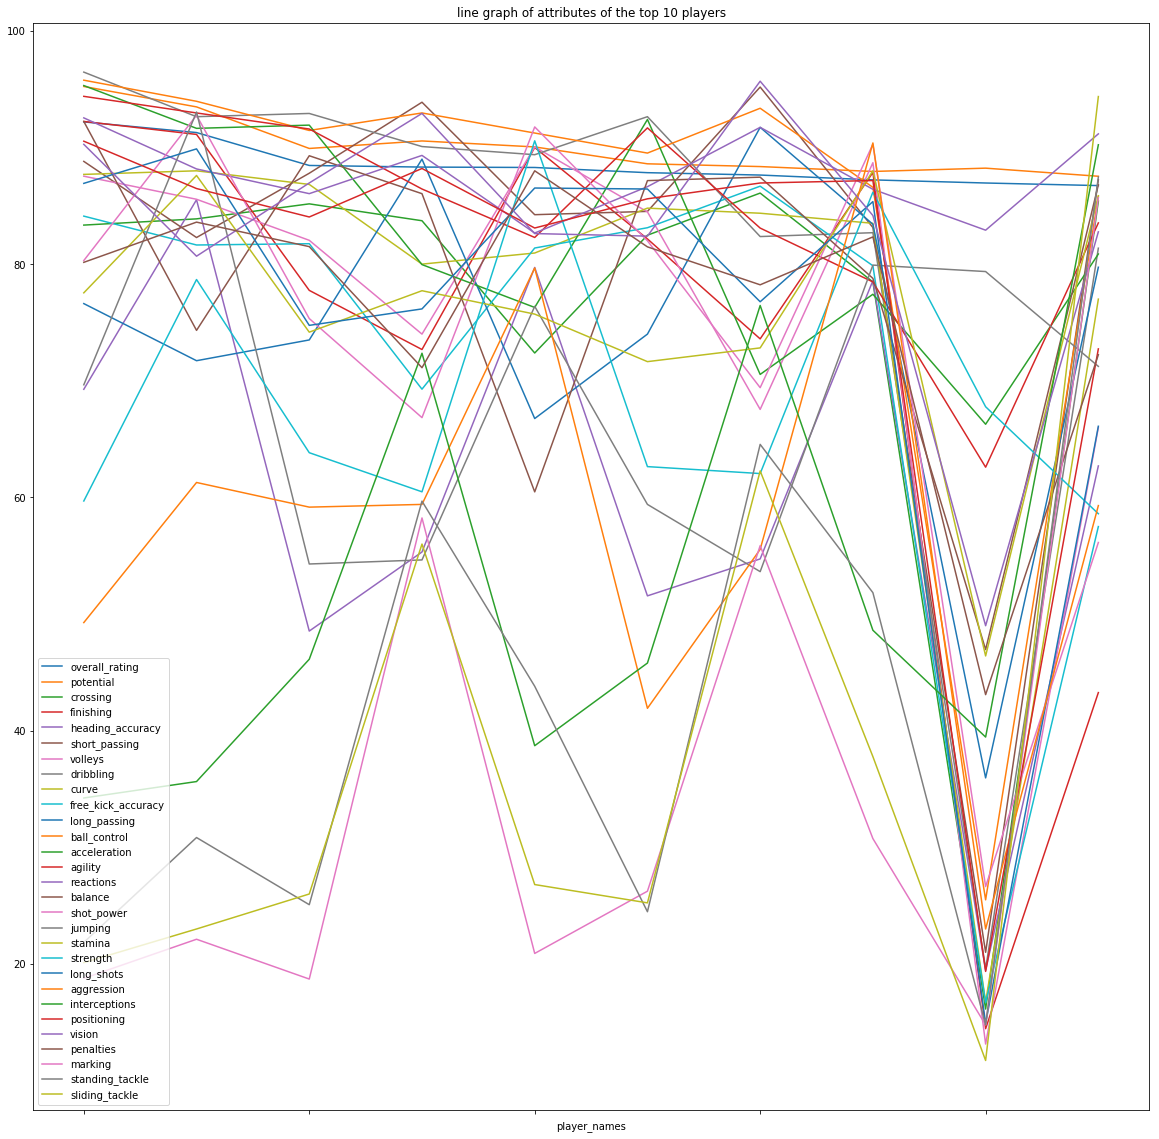

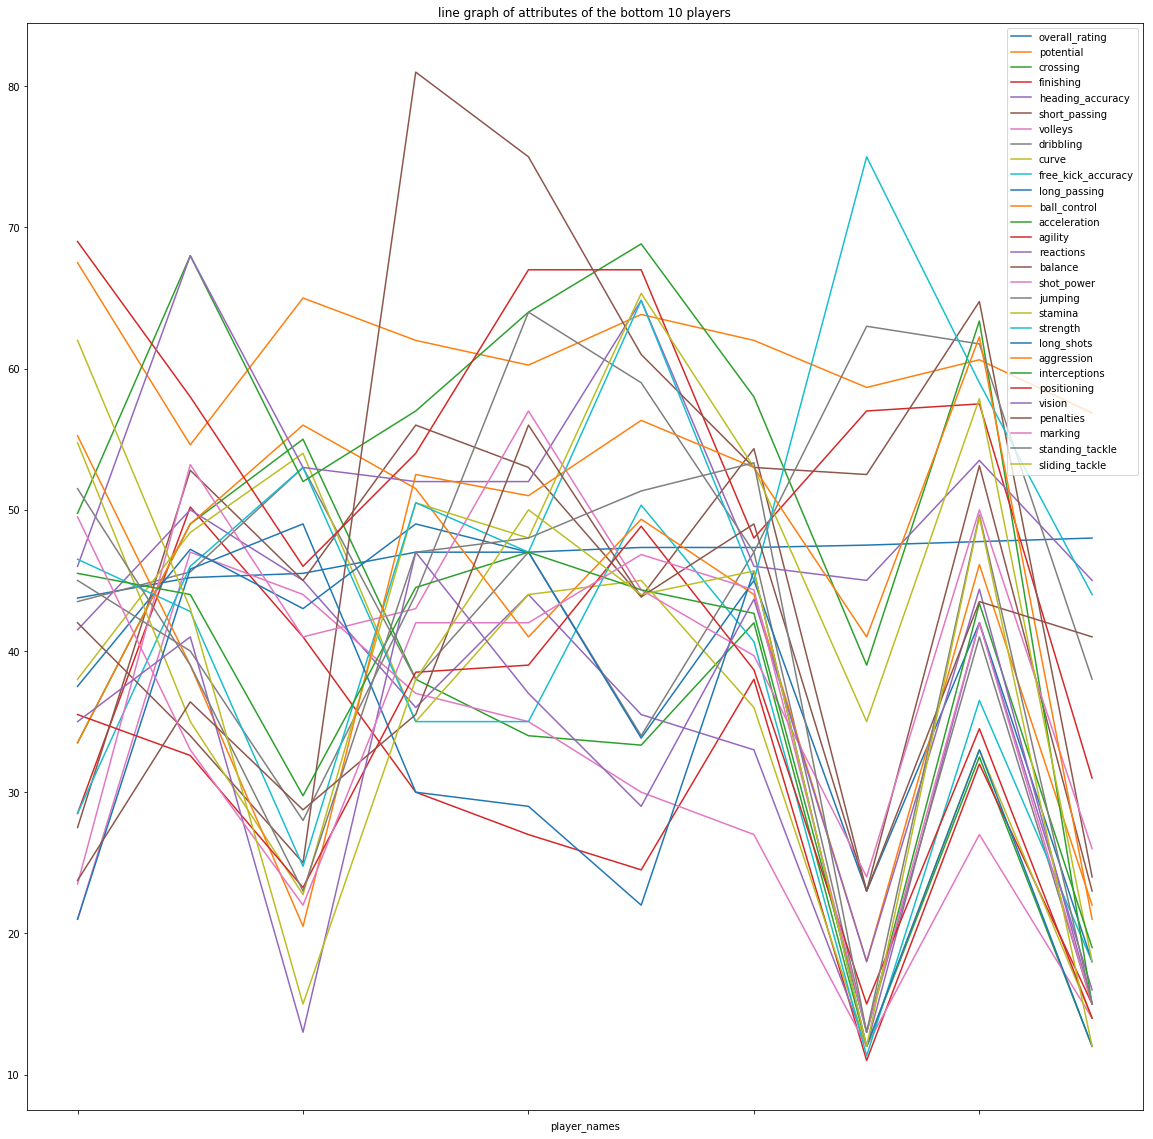

In [84]:
# Creating a line graph for all attributes for the top
# and bottom 10 players
df_highest_rated.plot(figsize=(20, 20), kind='line', title='line graph of attributes of the top 10 players');
df_lowest_rated.plot(figsize=(20, 20), kind='line', title='line graph of attributes of the bottom 10 players');

### Research Question 3  (How do attributes like reactions, strength, and finishing show in each group? )

# Line graph for reactions based on overall rating
The graphs show a more uniform relation between overall rating
and reactions for the top 10 players as opposed to the bottom 10.

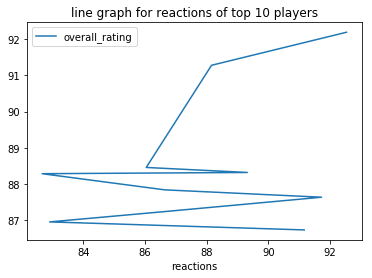

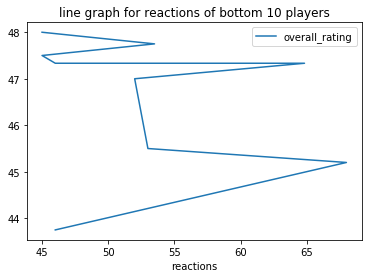

In [86]:
#Creating a line graph for the reactions based on the overall rating
df_highest_rated.plot(x='reactions', y='overall_rating', kind='line', title='line graph for reactions of top 10 players');
df_lowest_rated.plot(x='reactions', y='overall_rating', kind='line', title='line graph for reactions of bottom 10 players');

# Line graph for strength based on overall rating
The graphs show a less uniform correlation between strength
and overall rating in both groups.

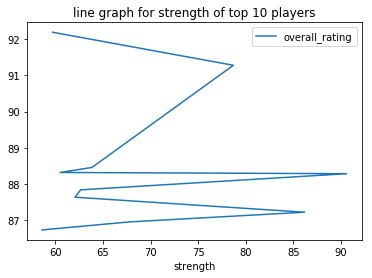

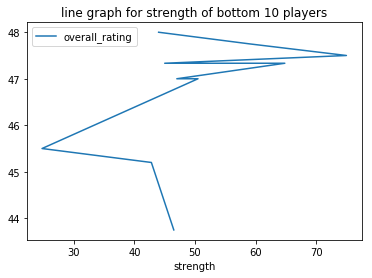

In [88]:
# creating a line graph for strength based on overall rating
df_highest_rated.plot(x='strength', y='overall_rating', kind='line', title='line graph for strength of top 10 players');
df_lowest_rated.plot(x='strength', y='overall_rating', kind='line', title='line graph for strength of bottom 10 players');

# Line graph for potential based on overall rating
The graphs show a strong correlation between potential and
overall rating for the top players and weaker correlatoin for the bottom players.

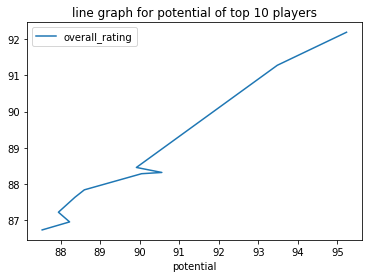

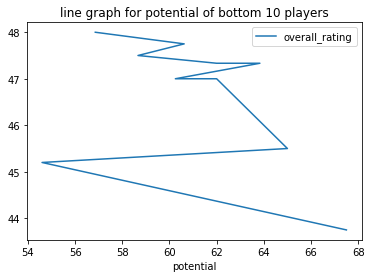

In [90]:
# creating a line graph for potential based on overall rating
df_highest_rated.plot(x='potential', y='overall_rating', kind='line', title='line graph for potential of top 10 players');
df_lowest_rated.plot(x='potential', y='overall_rating', kind='line', title='line graph for potential of bottom 10 players');

# Line graph for potential based on finishing
The graphs show a more uniform correlation between potential and
finishing for the top players and less so for the bottom players.

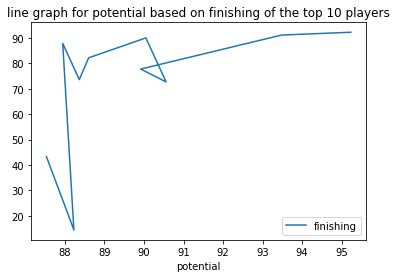

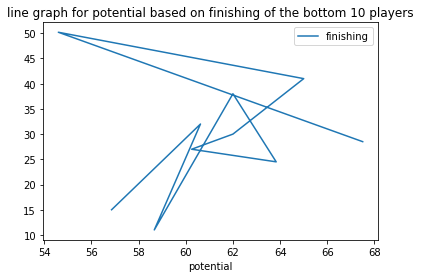

In [92]:
# creating a line graph of potential based on finishing
df_highest_rated.plot(x='potential', y='finishing', kind='line', title='line graph for potential based on finishing of the top 10 players');
df_lowest_rated.plot(x='potential', y='finishing', kind='line', title='line graph for potential based on finishing of the bottom 10 players');

### Research Question 3  (What is the preferred foot in each group?)

# Pie chart for the preferred foot in the two groups
The pie charts show that the preferred foot in both groups is
the right foot with a more prevalance of the left foot for the bottom 10.

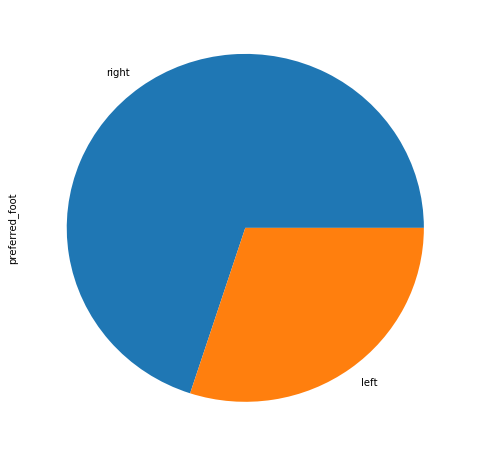

In [94]:
# creating a pie chart for the preferred foot among the top 10 players
df_highest_rated['preferred_foot'].value_counts().plot(kind='pie', figsize=(8, 8));

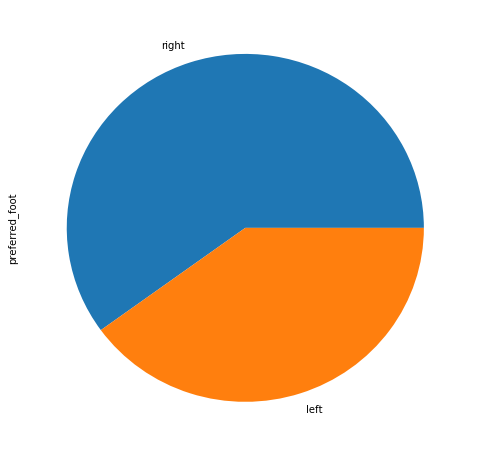

In [95]:
# creating a pie chart for the preferred foot among the bottom 10 players
df_lowest_rated['preferred_foot'].value_counts().plot(kind='pie', figsize=(8, 8));

<a id='conclusions'></a>
## Conclusions

In the top players potential and overall attributes shows stronger correlation than that shown by the bottom players. The same runs true for other attributes like finishing, and reactions. Meanwhile, strength does not seem to correlate with the overall rating. For both groups, the right foot is more preferreable but with higher prevalence in the bottom players. 

Some of the provided data was missing and thus, some players on the list were dropped. This might have some effect on the final results of this analysis. 

In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0